**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [29]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
#load_ext pycodestyle_magic

In [30]:
#%%pycodestyle

class MyKNeighborsClassifier(NeighborsBase,
                             KNeighborsMixin,
                             SupervisedIntegerMixin, 
                             ClassifierMixin):
    
    def __init__(self, n_neighbors=5, algorithm='brute'):
        self.neighbors  = n_neighbors
        self.algorithm = algorithm
    
    def fit(self, X, y):
        self.X = np.copy(X).astype(float)
        self.y = np.copy(y).astype(int)
        self.sqr_X = (self.X ** 2).sum(axis=1)
        self.classes = np.unique(y)
        
    def predict(self, X):
        if self.algorithm == 'brute':
            sqr_x = (X ** 2).sum(axis=1)
            mul_x = np.dot(X, self.X.T)
            sqr_dist  = sqr_x.reshape(-1, 1) + self.sqr_X - 2 * mul_x 
            i = sqr_dist.argsort(axis=1)[:, :self.neighbors]
        if self.algorithm == 'kd_tree':
            tree = KDTree(self.X, leaf_size = 70)
            d, i = tree.query(X, k=self.neighbors)
        predict = self.y[i]
        return np.array([np.bincount(predict[i]).argmax()
                         for i in range(predict.shape[0])], dtype = int)
        
    def predict_proba(self, X):
        if self.algorithm == 'brute':
            sqr_x = (X ** 2).sum(axis=1)
            mul_x = np.dot(X, self.X.T)
            sqr_dist  = sqr_x.reshape(-1, 1) + self.sqr_X - 2 * mul_x
            i = sqr_dist.argsort(axis=1)[:, :self.neighbors]
        if self.algorithm == 'kd_tree':
            tree = KDTree(self.X, leaf_size = 50)
            d, i = tree.query(X, k=self.neighbors) 
        predict = self.y[i]
        kol_obj = X.shape[0]
        kol_classes = self.classes.shape[0]
        pred = np.zeros((kol_obj, kol_classes))            
        for i in range(kol_obj):
            classes, counts = np.unique(predict[i], return_counts=True)
            pred[i][classes] = counts;  
        return pred / self.neighbors
    
    def score(self, X, y):
        return np.mean(y == self.predict(X))

**IRIS**

In [59]:
iris = datasets.load_iris()

In [60]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [61]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [62]:
%time clf.fit(X_train, y_train)

Wall time: 992 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [63]:
%time my_clf.fit(X_train, y_train)

Wall time: 495 µs


In [64]:
%time clf.predict(X_test)

Wall time: 993 µs


array([1, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 1, 2, 1, 0])

In [65]:
%time my_clf.predict(X_test)

Wall time: 494 µs


array([1, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 1, 2, 1, 0])

In [66]:
%time clf.predict_proba(X_test)

Wall time: 1.49 ms


array([[0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ]])

In [68]:
%time my_clf.predict_proba(X_test)

Wall time: 1.49 ms


array([[0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ]])

In [69]:
clf.score(X_test, y_test)

0.9333333333333333

In [70]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

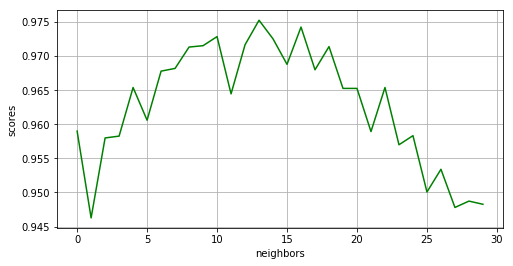

In [71]:
fig  = plt.figure(figsize = (8, 4))
ax = plt.subplot(111)

n_neighbors = 30
score = list()
iters = 1000
for i in range(1,n_neighbors+1):
    scores_all = 0
    for j in range(iters):
        X_train, X_test, y_train, y_test = train_test_split(
            iris.data,
            iris.target,
            test_size=0.1,
            stratify=iris.target
            )
        my_knn = MyKNeighborsClassifier(n_neighbors=i)
        my_knn.fit(X_train, y_train)
        scores_all  += my_knn.score(X_test, y_test)
    score.append(float(scores_all) / iters)
    
ax.plot(range(0,n_neighbors), score, 'green')
ax.set_xlabel("neighbors")
ax.set_ylabel("scores")
ax.grid()


In [72]:
print(np.array(score).argmax() + 1)

14


**MNIST**

In [73]:
mnist = fetch_mldata('MNIST original')

In [74]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [75]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [76]:
%time clf.fit(X_train, y_train)

Wall time: 33.2 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [77]:
%time my_clf.fit(X_train, y_train)

Wall time: 529 ms


In [78]:
%time clf.predict(X_test)

Wall time: 1min 18s


array([4., 1., 2., 7., 3., 9., 3., 2., 9., 2., 8., 2., 5., 7., 4., 8., 8.,
       3., 0., 6., 0., 5., 4., 9., 1., 2., 8., 8., 5., 8., 2., 6., 5., 2.,
       9., 7., 9., 5., 1., 1., 1., 2., 2., 4., 1., 9., 1., 3., 4., 6., 6.,
       1., 7., 0., 3., 1., 3., 3., 1., 4., 9., 4., 0., 5., 2., 8., 0., 5.,
       3., 6., 9., 8., 6., 3., 0., 2., 5., 9., 7., 6., 8., 9., 8., 6., 6.,
       1., 5., 8., 6., 6., 1., 1., 7., 3., 3., 4., 5., 1., 8., 1., 4., 1.,
       8., 8., 6., 0., 6., 7., 9., 7., 1., 2., 5., 8., 7., 8., 5., 2., 8.,
       3., 8., 4., 8., 1., 0., 8., 0., 9., 1., 2., 0., 3., 6., 7., 0., 6.,
       5., 2., 7., 3., 7., 4., 2., 6., 4., 9., 2., 6., 3., 4., 0., 2., 3.,
       4., 4., 4., 1., 8., 4., 1., 8., 0., 2., 7., 2., 7., 1., 8., 8., 9.,
       1., 9., 0., 3., 9., 0., 3., 6., 4., 5., 5., 5., 8., 5., 6., 5., 3.,
       9., 9., 5., 2., 2., 7., 9., 0., 9., 7., 8., 5., 5., 9., 7., 0., 0.,
       3., 1., 0., 9., 4., 9., 6., 9., 0., 3., 8., 9., 7., 8., 9., 3., 9.,
       1., 3., 9., 3., 2.

In [79]:
%time my_clf.predict(X_test)

Wall time: 6.71 s


array([4, 1, 2, 7, 3, 9, 3, 2, 9, 2, 8, 2, 5, 7, 4, 8, 8, 3, 0, 6, 0, 5,
       4, 9, 1, 2, 8, 8, 5, 8, 2, 6, 5, 2, 9, 7, 9, 5, 1, 1, 1, 2, 2, 4,
       1, 9, 1, 3, 4, 6, 6, 1, 7, 0, 3, 1, 3, 3, 1, 4, 9, 4, 0, 5, 2, 8,
       0, 5, 3, 6, 9, 8, 6, 3, 0, 2, 5, 9, 7, 6, 8, 9, 8, 6, 6, 1, 5, 8,
       6, 6, 1, 1, 7, 3, 3, 4, 5, 1, 8, 1, 4, 1, 8, 8, 6, 0, 6, 7, 9, 7,
       1, 2, 5, 8, 7, 8, 5, 2, 8, 3, 8, 4, 8, 1, 0, 8, 0, 9, 1, 2, 0, 3,
       6, 7, 0, 6, 5, 2, 7, 3, 7, 4, 2, 6, 4, 9, 2, 6, 3, 4, 0, 2, 3, 4,
       4, 4, 1, 8, 4, 1, 8, 0, 2, 7, 2, 7, 1, 8, 8, 9, 1, 9, 0, 3, 9, 0,
       3, 6, 4, 5, 5, 5, 8, 5, 6, 5, 3, 9, 9, 5, 2, 2, 7, 9, 0, 9, 7, 8,
       5, 5, 9, 7, 0, 0, 3, 1, 0, 9, 4, 9, 6, 9, 0, 3, 8, 9, 7, 8, 9, 3,
       9, 1, 3, 9, 3, 2, 6, 5, 3, 1, 6, 7, 3, 0, 0, 0, 0, 1, 2, 0, 7, 1,
       3, 9, 1, 4, 2, 6, 9, 9, 1, 3, 7, 7, 6, 3, 0, 3, 8, 5, 3, 5, 2, 6,
       1, 7, 6, 4, 6, 4, 7, 4, 8, 3, 2, 1, 2, 2, 5, 6, 9, 6, 3, 5, 7, 9,
       1, 7, 7, 9, 2, 8, 0, 7, 8, 3, 1, 3, 6, 8, 4,

In [80]:
%time clf.predict_proba(X_test)

Wall time: 1min 27s


array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.5, 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [81]:
%time my_clf.predict_proba(X_test)

Wall time: 6.97 s


array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.5, 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [82]:
clf.score(X_test, y_test)

0.9757142857142858

In [83]:
my_clf.score(X_test, y_test)

0.9757142857142858

Задание 4

In [34]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [40]:
%time clf.fit(X_train, y_train)

Wall time: 37.3 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [36]:
%time my_clf.fit(X_train, y_train)

Wall time: 775 ms


In [45]:
%time clf.predict(X_test)

Wall time: 1min 37s


array([7., 7., 5., 2., 9., 4., 1., 5., 4., 5., 6., 6., 4., 9., 2., 0., 0.,
       3., 3., 3., 9., 5., 0., 0., 5., 2., 6., 8., 9., 8., 1., 2., 4., 2.,
       7., 8., 9., 2., 4., 0., 7., 5., 4., 6., 8., 9., 3., 9., 2., 9., 8.,
       7., 6., 6., 9., 1., 6., 6., 8., 1., 1., 4., 1., 9., 5., 7., 6., 1.,
       1., 5., 6., 6., 8., 3., 2., 2., 1., 2., 7., 8., 0., 9., 7., 2., 9.,
       1., 8., 5., 0., 9., 4., 5., 6., 4., 3., 8., 1., 5., 1., 1., 3., 6.,
       0., 0., 1., 8., 9., 7., 1., 0., 7., 2., 3., 6., 7., 8., 2., 7., 9.,
       6., 5., 7., 0., 4., 4., 1., 7., 0., 7., 1., 0., 1., 8., 6., 2., 8.,
       8., 1., 5., 1., 7., 0., 8., 2., 1., 8., 8., 1., 1., 2., 0., 4., 5.,
       0., 4., 4., 8., 1., 7., 3., 4., 3., 2., 6., 1., 5., 1., 3., 7., 5.,
       4., 1., 6., 3., 4., 1., 9., 0., 0., 7., 2., 0., 0., 9., 8., 4., 1.,
       9., 2., 3., 5., 9., 1., 1., 5., 1., 9., 2., 2., 6., 0., 7., 3., 5.,
       0., 6., 3., 4., 1., 8., 5., 4., 7., 7., 2., 1., 9., 7., 7., 8., 7.,
       8., 3., 7., 2., 3.

In [42]:
%time my_clf.predict(X_test)

Wall time: 1min 38s


array([7, 7, 5, 2, 9, 4, 1, 5, 4, 5, 6, 6, 4, 9, 2, 0, 0, 3, 3, 3, 9, 5,
       0, 0, 5, 2, 6, 8, 9, 8, 1, 2, 4, 2, 7, 8, 9, 2, 4, 0, 7, 5, 4, 6,
       8, 9, 3, 9, 2, 9, 8, 7, 6, 6, 9, 1, 6, 6, 8, 1, 1, 4, 1, 9, 5, 7,
       6, 1, 1, 5, 6, 6, 8, 3, 2, 2, 1, 2, 7, 8, 0, 9, 7, 2, 9, 1, 8, 5,
       0, 9, 4, 5, 6, 4, 3, 8, 1, 5, 1, 1, 3, 6, 0, 0, 1, 8, 9, 7, 1, 0,
       7, 2, 3, 6, 7, 8, 2, 7, 9, 6, 5, 7, 0, 4, 4, 1, 7, 0, 7, 1, 0, 1,
       8, 6, 2, 8, 8, 1, 5, 1, 7, 0, 8, 2, 1, 8, 8, 1, 1, 2, 0, 4, 5, 0,
       4, 4, 8, 1, 7, 3, 4, 3, 2, 6, 1, 5, 1, 3, 7, 5, 4, 1, 6, 3, 4, 1,
       9, 0, 0, 7, 2, 0, 0, 9, 8, 4, 1, 9, 2, 3, 5, 9, 1, 1, 5, 1, 9, 2,
       2, 6, 0, 7, 3, 5, 0, 6, 3, 4, 1, 8, 5, 4, 7, 7, 2, 1, 9, 7, 7, 8,
       7, 8, 3, 7, 2, 3, 7, 7, 5, 6, 7, 0, 8, 7, 6, 7, 2, 9, 9, 4, 1, 2,
       6, 0, 6, 3, 4, 7, 8, 7, 4, 3, 2, 5, 2, 3, 4, 5, 1, 1, 4, 6, 2, 9,
       7, 1, 6, 1, 1, 0, 4, 2, 9, 7, 2, 1, 7, 1, 7, 1, 2, 3, 0, 1, 7, 9,
       4, 5, 3, 5, 6, 1, 9, 4, 5, 4, 8, 9, 8, 3, 3,

In [48]:
%time clf.predict_proba(X_test)

Wall time: 1min 42s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [46]:
%time my_clf.predict_proba(X_test)

Wall time: 1min 44s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [49]:
clf.score(X_test, y_test)

0.9528571428571428

In [50]:
my_clf.score(X_test, y_test)

0.9528571428571428

Задание 5

In [ ]:
# seaborn - библиотека Python для визуализации данных, основанная на matplotlib 
# matplotlib - библиотека Python для визуализации данных c двумерной графикой.
# train_test_split - функция для разделения матрицы данных на тестовую и тренировочную 
# выборки с заданным соотношением размеров
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - класс для последовательного выполнения 
# некоторых операций над данными
# StandardScaler (from sklearn.preprocessing import StandardScaler) - класс для стандартизации набора данных
# ClassifierMixin - класс для всех классификаторов в scikit-learn
# NeighborsBase -  класс для оценок ближайших соседей
# KNeighborsMixin - класс для поиска k ближайших соседей
# SupervisedIntegerMixin - класс с методом fit(self, X, y), обучающий классификатор на данных X со значениями y